In [107]:
import capstone_eval as ce
from bs4 import BeautifulSoup as bs
import numpy as np
from PIL import Image

In [108]:
import warnings
warnings.simplefilter("ignore") # ignores the warning when diving by 0
                                # some of the images are all black
                                # i.e. all pixels have grayscale level = 0
                                # so mean of the intensity is also 0
                                # This affects those metrics where relative error
                                # of some form is placed in the denominator

In [109]:
def extract_imgs(directory):
    soup = bs(open(directory + '/index.html'), "html.parser")
    image_tags = soup.findAll('img')
    inp, out, targ = [], [], []
    for image_tag in range(0,len(image_tags),3):
        inp.append(directory + '/' + image_tags[image_tag].get('src'))
        out.append(directory + '/' + image_tags[image_tag+1].get('src'))
        targ.append(directory + '/' + image_tags[image_tag+2].get('src'))
    return inp, out, targ

In [110]:
pix2pix_run_dir = '/home/satyam/Desktop/CAPSTONE/DATA/run2'
test_out = pix2pix_run_dir + '/test_out'
train_out = pix2pix_run_dir + '/train_out'

In [111]:
def calculate_rmse(prediction_imgs, target_imgs, channel):
    rmse_list = [];
    for i in range(0,len(target_imgs)):
        rmse_list.append(ce.rmse_dir(prediction_imgs[i], target_imgs[i], channel))
    return rmse_list

In [112]:
def calculate_mbe(prediction_imgs, target_imgs, channel):
    mbe_list = [];
    for i in range(0,len(target_imgs)):
        mbe_list.append(ce.mbe_dir(prediction_imgs[i], target_imgs[i], channel))
    return mbe_list

In [113]:
def calculate_cv(prediction_imgs, target_imgs, channel):
    cv_list = [];
    for i in range(0,len(target_imgs)):
        cv_list.append(ce.cv_rmse_dir(prediction_imgs[i], target_imgs[i], channel))
    return cv_list

# Run_2 : TRAIN_OUT 

## Comparing ground truth (trained image) vs generated images

In [114]:
input_images_links, output_images_links, target_images_links = extract_imgs(train_out)

### RMSE measurements for RUN2

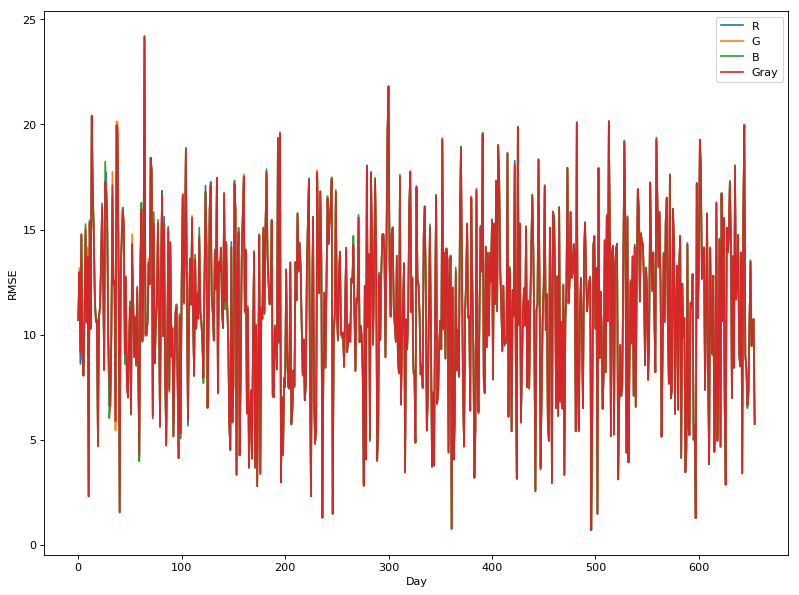

R:    Min   0.708997041991053               Avg   11.192972712947768               Max   24.128107359401582
G:    Min   0.709448852767194               Avg   11.208643111365012                Max   24.187231886448682
B:    Min   0.7112317721228875               Avg   11.198780287471072               Max   24.20845131543233
Gray: Min   0.7092767004560021                 Avg   11.192499812864648                Max   24.150679248466638


In [115]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')

R = calculate_rmse(output_images_links, target_images_links, 'r')
G = calculate_rmse(output_images_links, target_images_links, 'g')
B = calculate_rmse(output_images_links, target_images_links, 'b')
Gray = calculate_rmse(output_images_links, target_images_links, 'gray')



plt.plot(R, label= 'R') 
plt.plot(G, label= 'G') 
plt.plot(B, label= 'B') 
plt.plot(Gray, label= 'Gray') 

plt.ylabel('RMSE')
plt.xlabel('Day')
plt.legend()
plt.show()


print(f'R:    Min   {np.amin(R)}               Avg   {np.mean(R)}               Max   {np.amax(R)}')  
print(f'G:    Min   {np.amin(G)}               Avg   {np.mean(G)}                Max   {np.amax(G)}')
print(f'B:    Min   {np.amin(B)}               Avg   {np.mean(B)}               Max   {np.amax(B)}')
print(f'Gray: Min   {np.amin(Gray)}                 Avg   {np.mean(Gray)}                Max   {np.amax(Gray)}')

### Mean Bias Error for RUN

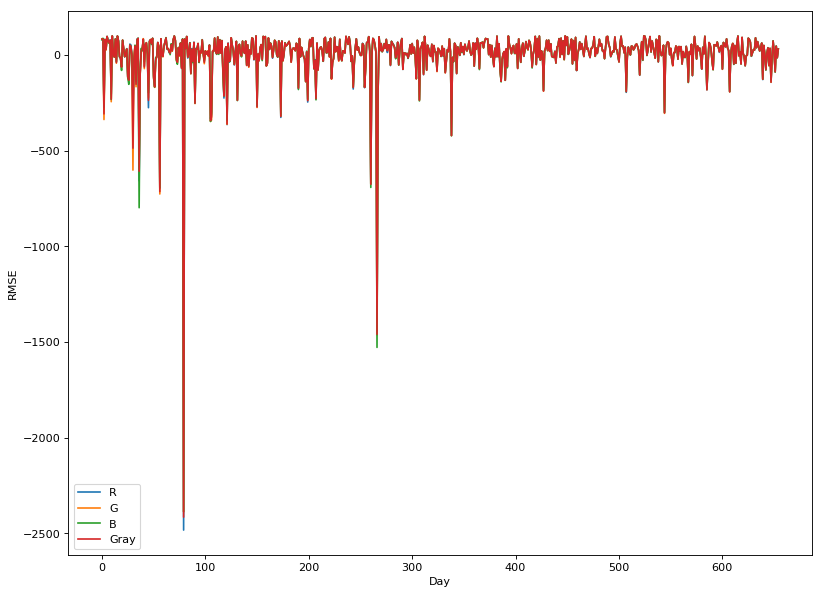

R:    Min   -2483.628981839273              Avg   5.023029747897089                Max   99.9250815416799
G:    Min   -2387.497071854837               Avg   4.468618395627765                Max   99.94104777050221
B:    Min   -2387.422493181459              Avg   4.844024204262237                 Max   99.92385337023202
Gray: Min   -2415.973648073234                 Avg   4.686681349165836                 Max   99.93432119829939


In [118]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')

R = calculate_mbe(output_images_links, target_images_links, 'r')
G = calculate_mbe(output_images_links, target_images_links, 'g')
B = calculate_mbe(output_images_links, target_images_links, 'b')
Gray = calculate_mbe(output_images_links, target_images_links, 'gray')



plt.plot(R, label= 'R') 
plt.plot(G, label= 'G') 
plt.plot(B, label= 'B') 
plt.plot(Gray, label= 'Gray') 

plt.ylabel('RMSE')
plt.xlabel('Day')
plt.legend()
plt.show()


print(f'R:    Min   {np.amin(R)}              Avg   {np.mean(R)}                Max   {np.amax(R)}')  
print(f'G:    Min   {np.amin(G)}               Avg   {np.mean(G)}                Max   {np.amax(G)}')
print(f'B:    Min   {np.amin(B)}              Avg   {np.mean(B)}                 Max   {np.amax(B)}')
print(f'Gray: Min   {np.amin(Gray)}                 Avg   {np.mean(Gray)}                 Max   {np.amax(Gray)}')

### Coefficient of Variation

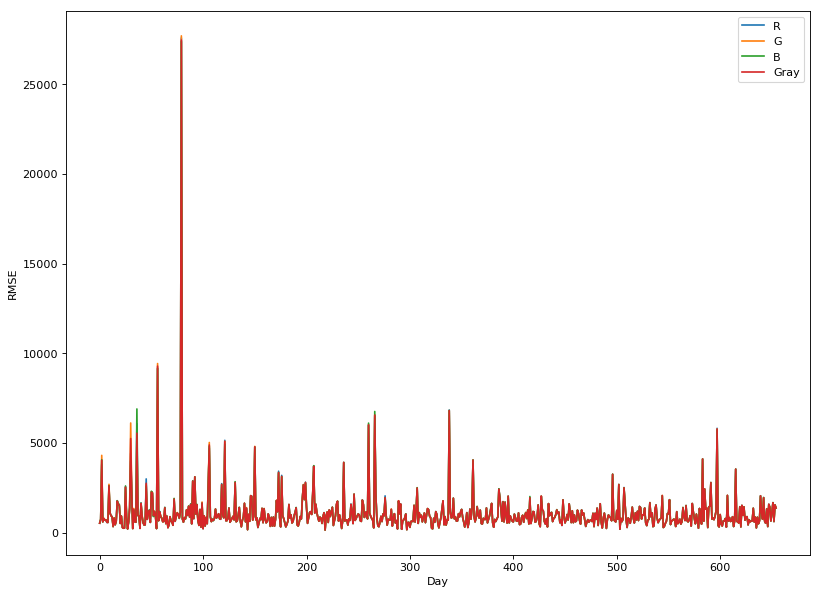

R:    Min   152.17718878386884               Avg   1078.810911368554                Max   27596.815578868467
G:    Min   151.39332724772174               Avg   1081.7340566429837                Max   27710.02333034293
B:    Min   150.51011389384126               Avg   1079.528217919301                 Max   27391.971838124362
Gray: Min   151.28611152824428               Avg   1078.9175223124362                Max   27479.645460662556


In [119]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')

R = calculate_cv(output_images_links, target_images_links, 'r')
G = calculate_cv(output_images_links, target_images_links, 'g')
B = calculate_cv(output_images_links, target_images_links, 'b')
Gray = calculate_cv(output_images_links, target_images_links, 'gray')


plt.plot(R, label= 'R') 
plt.plot(G, label= 'G') 
plt.plot(B, label= 'B') 
plt.plot(Gray, label= 'Gray') 

plt.ylabel('RMSE')
plt.xlabel('Day')
plt.legend()
plt.show()


print(f'R:    Min   {np.amin(R)}               Avg   {np.mean(R)}                Max   {np.amax(R)}')  
print(f'G:    Min   {np.amin(G)}               Avg   {np.mean(G)}                Max   {np.amax(G)}')
print(f'B:    Min   {np.amin(B)}               Avg   {np.mean(B)}                 Max   {np.amax(B)}')
print(f'Gray: Min   {np.amin(Gray)}               Avg   {np.mean(Gray)}                Max   {np.amax(Gray)}')

### Comparing the metrics

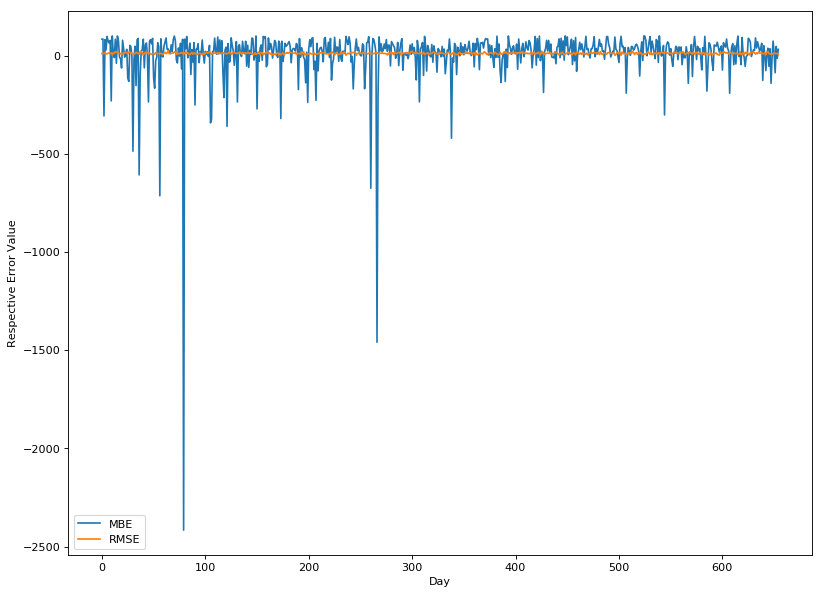

MBE:    Min   -2415.973648073234               Avg   4.686681349165836             Max   99.93432119829939
RMSE:   Min   0.7092767004560021                  Avg   11.192499812864648              Max   24.150679248466638


In [121]:
import matplotlib.pyplot as plt
figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')

mbe_gray = calculate_mbe(output_images_links, target_images_links, 'gray')
rmse_gray = calculate_rmse(output_images_links, target_images_links, 'gray')
#cv_gray = calculate_cv(output_images_links, target_images_links, 'gray')

plt.plot(mbe_gray, label="MBE")
plt.plot(rmse_gray, label="RMSE") 
#plt.plot(cv_gray, label= 'Coefficient of Variation') 

plt.ylabel('Respective Error Value')
plt.xlabel('Day')
plt.legend()

plt.show()

print(f'MBE:    Min   {np.amin(mbe_gray)}               Avg   {np.mean(mbe_gray)}             Max   {np.amax(mbe_gray)}')  
print(f'RMSE:   Min   {np.amin(rmse_gray)}                  Avg   {np.mean(rmse_gray)}              Max   {np.amax(rmse_gray)}')
#print(f'G:    Min   {np.amin(cv_gray)}               Avg   {np.mean(cv_gray)}                Max   {np.amax(cv_gray)}')

# Run_2 : TEST_OUT

## Comparing ground truth (not used in training, model has not this before) vs generated images

In [122]:
input_images_links, output_images_links, target_images_links = extract_imgs(test_out)

### RMSE measurements for RUN1 

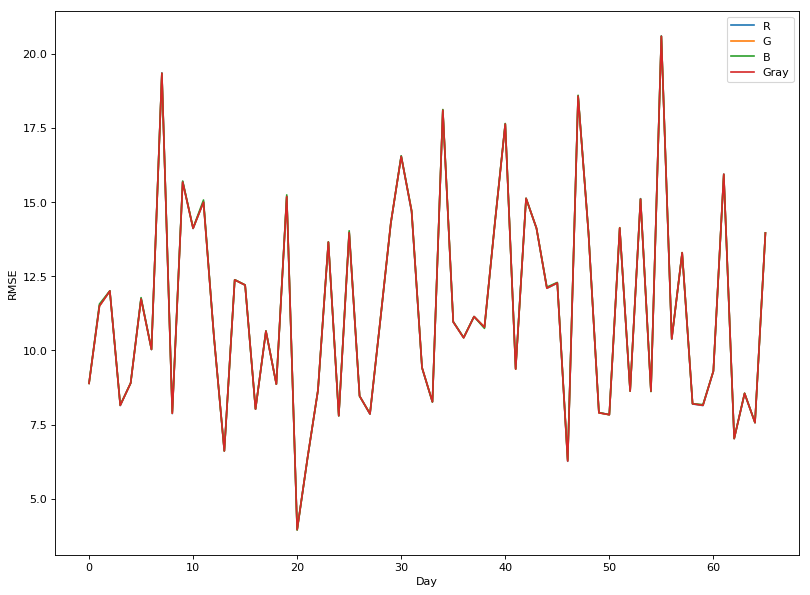

R:    Min   3.9624477966686973               Avg   11.410136948631603               Max   20.610791900313448
G:    Min   3.9572128509589097               Avg   11.41274844080656                Max   20.595446800128965
B:    Min   3.9428001414151055               Avg   11.420429916272578               Max   20.59949806905181
Gray: Min   3.95561400562258                 Avg   11.41002012608419                Max   20.596828683153547


In [123]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')

R = calculate_rmse(output_images_links, target_images_links, 'r')
G = calculate_rmse(output_images_links, target_images_links, 'g')
B = calculate_rmse(output_images_links, target_images_links, 'b')
Gray = calculate_rmse(output_images_links, target_images_links, 'gray')



plt.plot(R, label= 'R') 
plt.plot(G, label= 'G') 
plt.plot(B, label= 'B') 
plt.plot(Gray, label= 'Gray') 

plt.ylabel('RMSE')
plt.xlabel('Day')
plt.legend()
plt.show()


print(f'R:    Min   {np.amin(R)}               Avg   {np.mean(R)}               Max   {np.amax(R)}')  
print(f'G:    Min   {np.amin(G)}               Avg   {np.mean(G)}                Max   {np.amax(G)}')
print(f'B:    Min   {np.amin(B)}               Avg   {np.mean(B)}               Max   {np.amax(B)}')
print(f'Gray: Min   {np.amin(Gray)}                 Avg   {np.mean(Gray)}                Max   {np.amax(Gray)}')

### Mean Bias Error for RUN

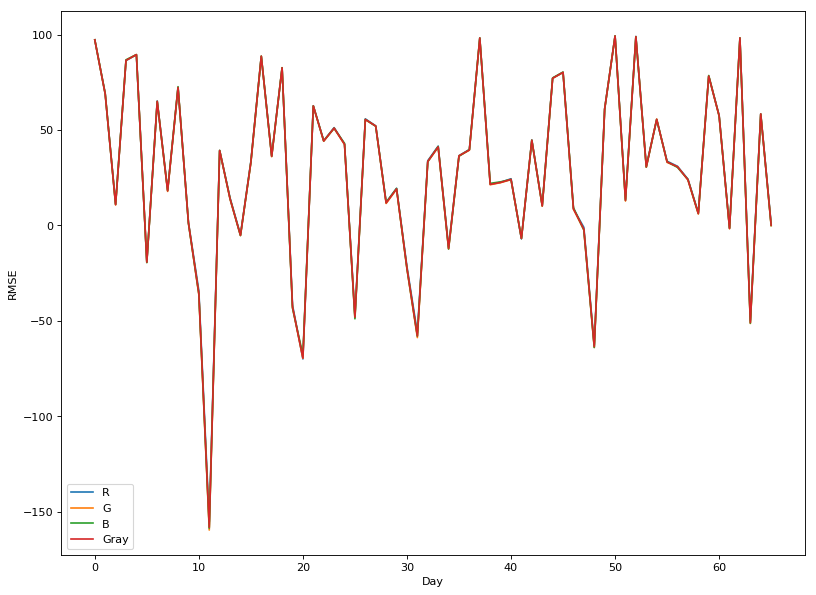

R:    Min   -155.33967483295496              Avg   28.050856666060437                Max   99.33585905556987
G:    Min   -159.6704839172432               Avg   27.557596046865296                Max   99.28195776152916
B:    Min   -158.66951875142047              Avg   27.74688481701903                 Max   99.29735813125508
Gray: Min   -158.23592800465397                 Avg   27.733854806135565                 Max   99.29989630469052


In [125]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')

R = calculate_mbe(output_images_links, target_images_links, 'r')
G = calculate_mbe(output_images_links, target_images_links, 'g')
B = calculate_mbe(output_images_links, target_images_links, 'b')
Gray = calculate_mbe(output_images_links, target_images_links, 'gray')



plt.plot(R, label= 'R') 
plt.plot(G, label= 'G') 
plt.plot(B, label= 'B') 
plt.plot(Gray, label= 'Gray') 

plt.ylabel('RMSE')
plt.xlabel('Day')
plt.legend()
plt.show()


print(f'R:    Min   {np.amin(R)}              Avg   {np.mean(R)}                Max   {np.amax(R)}')  
print(f'G:    Min   {np.amin(G)}               Avg   {np.mean(G)}                Max   {np.amax(G)}')
print(f'B:    Min   {np.amin(B)}              Avg   {np.mean(B)}                 Max   {np.amax(B)}')
print(f'Gray: Min   {np.amin(Gray)}                 Avg   {np.mean(Gray)}                 Max   {np.amax(Gray)}')

### Coefficient of Variation

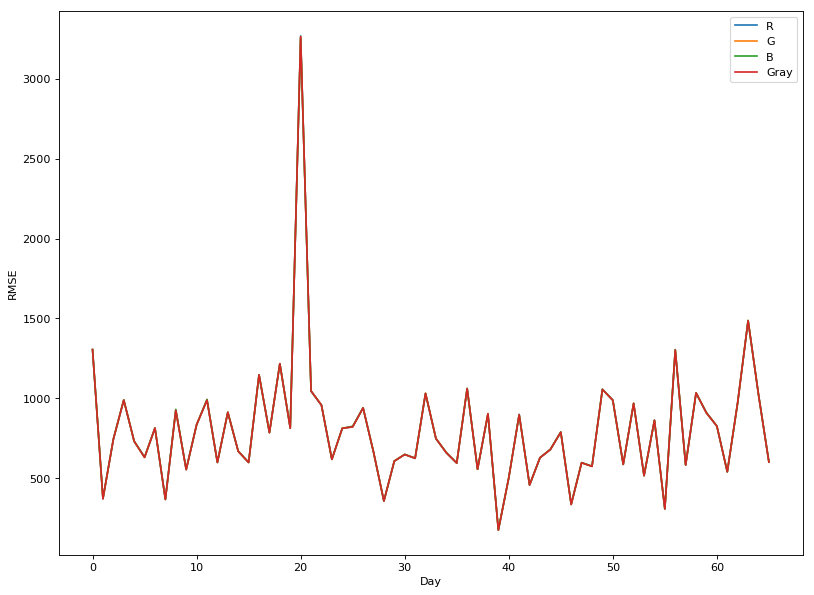

R:    Min   176.01375129564008               Avg   805.0512976802897                Max   3268.0124537240404
G:    Min   176.04774790273638               Avg   805.2370537060776                Max   3263.694953872424
B:    Min   176.38811860014468               Avg   805.479337318373                 Max   3251.8081312067325
Gray: Min   175.99915739885515               Avg   805.0208374387076                Max   3262.3763127851903


In [126]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')

R = calculate_cv(output_images_links, target_images_links, 'r')
G = calculate_cv(output_images_links, target_images_links, 'g')
B = calculate_cv(output_images_links, target_images_links, 'b')
Gray = calculate_cv(output_images_links, target_images_links, 'gray')


plt.plot(R, label= 'R') 
plt.plot(G, label= 'G') 
plt.plot(B, label= 'B') 
plt.plot(Gray, label= 'Gray') 

plt.ylabel('RMSE')
plt.xlabel('Day')
plt.legend()
plt.show()


print(f'R:    Min   {np.amin(R)}               Avg   {np.mean(R)}                Max   {np.amax(R)}')  
print(f'G:    Min   {np.amin(G)}               Avg   {np.mean(G)}                Max   {np.amax(G)}')
print(f'B:    Min   {np.amin(B)}               Avg   {np.mean(B)}                 Max   {np.amax(B)}')
print(f'Gray: Min   {np.amin(Gray)}               Avg   {np.mean(Gray)}                Max   {np.amax(Gray)}')

### Comparing the metrics

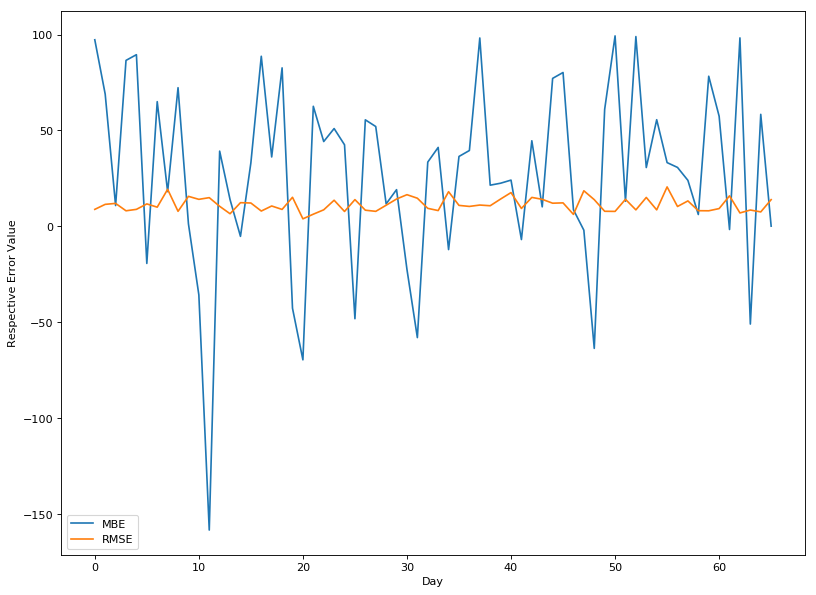

MBE:    Min   -158.23592800465397               Avg   27.733854806135565             Max   99.29989630469052
RMSE:   Min   3.95561400562258                  Avg   11.41002012608419              Max   20.596828683153547


In [127]:
import matplotlib.pyplot as plt
figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')

mbe_gray = calculate_mbe(output_images_links, target_images_links, 'gray')
rmse_gray = calculate_rmse(output_images_links, target_images_links, 'gray')
#cv_gray = calculate_cv(output_images_links, target_images_links, 'gray')

plt.plot(mbe_gray, label="MBE")
plt.plot(rmse_gray, label="RMSE") 
#plt.plot(cv_gray, label= 'Coefficient of Variation') 

plt.ylabel('Respective Error Value')
plt.xlabel('Day')
plt.legend()

plt.show()

print(f'MBE:    Min   {np.amin(mbe_gray)}               Avg   {np.mean(mbe_gray)}             Max   {np.amax(mbe_gray)}')  
print(f'RMSE:   Min   {np.amin(rmse_gray)}                  Avg   {np.mean(rmse_gray)}              Max   {np.amax(rmse_gray)}')
#print(f'G:    Min   {np.amin(cv_gray)}               Avg   {np.mean(cv_gray)}                Max   {np.amax(cv_gray)}')